# Lab 4. SDA (by Alina Kragel)

In [446]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pylab
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [447]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Task 1.

In [448]:
df = pd.read_csv(r"C:\Users\aowl2\OneDrive\Рабочий стол\var7.csv", delimiter=';', decimal=',')
print(df.shape)
df.info()
df.head(10)

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   150 non-null    int64  
 1   x.1     150 non-null    float64
 2   x.2     150 non-null    float64
 3   x.3     150 non-null    float64
 4   x.4     150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


,class,x.1,x.2,x.3,x.4
0,1,-3.499339,1.029699,0.706971,-2.287265
1,1,0.121735,-0.083737,-0.124936,-0.094390
2,1,-3.375625,2.239758,1.114127,-1.924546
3,1,-2.331633,-0.412985,-0.985260,-2.089342
4,1,-0.610839,-0.353523,-1.291351,-0.746407
5,1,-1.796894,1.270707,-1.162817,-1.552452
6,1,-0.875430,1.478192,0.768833,-0.800872
7,1,-0.553097,1.651351,-0.268500,-0.364517
8,1,-0.950946,-3.481551,-0.946885,-0.509321
9,1,-0.955692,1.189707,-0.138845,-1.117556


In [449]:
df['class'].value_counts()

1    50
2    50
3    50
Name: class, dtype: int64

## Task 2.

In [450]:
test_df = df.sample(n=15)
test_df

,class,x.1,x.2,x.3,x.4
118,3,1.454102,0.098975,2.730600,1.837127
77,2,-1.768792,4.124632,3.130532,-0.523386
46,1,-2.523846,2.414492,0.769935,-1.571833
67,2,-2.390840,-0.481695,3.876998,-0.544333
7,1,-0.553097,1.651351,-0.268500,-0.364517
97,2,-0.629917,0.449702,3.622952,1.006601
68,2,-1.247763,-0.462835,2.896703,0.530377
57,2,-0.881090,1.147650,3.749726,0.741464
110,3,0.585640,1.685879,2.400774,1.058822
23,1,-1.099173,-2.770337,-0.525351,-0.963432


In [451]:
train_df = df.drop(index=test_df.index)
print(train_df.to_string())

     class       x.1       x.2       x.3       x.4
0        1 -3.499339  1.029699  0.706971 -2.287265
1        1  0.121735 -0.083737 -0.124936 -0.094390
2        1 -3.375625  2.239758  1.114127 -1.924546
4        1 -0.610839 -0.353523 -1.291351 -0.746407
5        1 -1.796894  1.270707 -1.162817 -1.552452
6        1 -0.875430  1.478192  0.768833 -0.800872
8        1 -0.950946 -3.481551 -0.946885 -0.509321
9        1 -0.955692  1.189707 -0.138845 -1.117556
10       1 -2.244027  2.473844  1.136994 -0.641389
11       1 -0.609546  0.343196 -0.712379 -0.631597
12       1 -2.627977  0.451553  0.731701 -1.780617
13       1 -2.744243 -0.512458 -1.280833 -2.390732
14       1 -1.629755 -3.504931  0.815523 -0.039516
15       1 -2.276109 -1.770003 -0.054974 -1.393405
16       1 -1.755973  2.715288  2.102520 -0.443524
17       1 -1.155050 -2.097300  0.884334 -0.480331
18       1 -2.430514 -4.447133  0.970966 -1.132408
19       1 -2.018344  1.814214  0.660206 -0.803301
20       1 -1.815384  1.672755 

In [452]:
train_df.reset_index(drop=True, inplace=True)
print(train_df.to_string())

     class       x.1       x.2       x.3       x.4
0        1 -3.499339  1.029699  0.706971 -2.287265
1        1  0.121735 -0.083737 -0.124936 -0.094390
2        1 -3.375625  2.239758  1.114127 -1.924546
3        1 -0.610839 -0.353523 -1.291351 -0.746407
4        1 -1.796894  1.270707 -1.162817 -1.552452
5        1 -0.875430  1.478192  0.768833 -0.800872
6        1 -0.950946 -3.481551 -0.946885 -0.509321
7        1 -0.955692  1.189707 -0.138845 -1.117556
8        1 -2.244027  2.473844  1.136994 -0.641389
9        1 -0.609546  0.343196 -0.712379 -0.631597
10       1 -2.627977  0.451553  0.731701 -1.780617
11       1 -2.744243 -0.512458 -1.280833 -2.390732
12       1 -1.629755 -3.504931  0.815523 -0.039516
13       1 -2.276109 -1.770003 -0.054974 -1.393405
14       1 -1.755973  2.715288  2.102520 -0.443524
15       1 -1.155050 -2.097300  0.884334 -0.480331
16       1 -2.430514 -4.447133  0.970966 -1.132408
17       1 -2.018344  1.814214  0.660206 -0.803301
18       1 -1.815384  1.672755 

In [453]:
test_df.reset_index(drop=True, inplace=True)
test_df

,class,x.1,x.2,x.3,x.4
0,3,1.454102,0.098975,2.730600,1.837127
1,2,-1.768792,4.124632,3.130532,-0.523386
2,1,-2.523846,2.414492,0.769935,-1.571833
3,2,-2.390840,-0.481695,3.876998,-0.544333
4,1,-0.553097,1.651351,-0.268500,-0.364517
5,2,-0.629917,0.449702,3.622952,1.006601
6,2,-1.247763,-0.462835,2.896703,0.530377
7,2,-0.881090,1.147650,3.749726,0.741464
8,3,0.585640,1.685879,2.400774,1.058822
9,1,-1.099173,-2.770337,-0.525351,-0.963432


## Task 3.

In [454]:
model_lr = LogisticRegression()
model_lr.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
test_df['predicted_class_LR'] = model_lr.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
test_df

,class,x.1,x.2,x.3,x.4,predicted_class_LR
0,3,1.454102,0.098975,2.730600,1.837127,3
1,2,-1.768792,4.124632,3.130532,-0.523386,2
2,1,-2.523846,2.414492,0.769935,-1.571833,1
3,2,-2.390840,-0.481695,3.876998,-0.544333,2
4,1,-0.553097,1.651351,-0.268500,-0.364517,1
5,2,-0.629917,0.449702,3.622952,1.006601,2
6,2,-1.247763,-0.462835,2.896703,0.530377,2
7,2,-0.881090,1.147650,3.749726,0.741464,2
8,3,0.585640,1.685879,2.400774,1.058822,3
9,1,-1.099173,-2.770337,-0.525351,-0.963432,1


In [455]:
test_df['predicted_class_knn_3'] = model_knn_3.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])

NameError: name 'fit' is not defined

In [ ]:
df_compare = test_df['class'].compare(test_df['predicted_class_LR'])
print('Errors: ' + str(len(df_compare['self'])))
df_compare

## Task 4.

In [456]:
model_knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_knn_3.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
test_df['predicted_class_knn_3'] = model_knn_3.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
test_df

,class,x.1,x.2,x.3,x.4,predicted_class_LR,predicted_class_knn_3
0,3,1.454102,0.098975,2.730600,1.837127,3,3
1,2,-1.768792,4.124632,3.130532,-0.523386,2,2
2,1,-2.523846,2.414492,0.769935,-1.571833,1,1
3,2,-2.390840,-0.481695,3.876998,-0.544333,2,2
4,1,-0.553097,1.651351,-0.268500,-0.364517,1,3
5,2,-0.629917,0.449702,3.622952,1.006601,2,2
6,2,-1.247763,-0.462835,2.896703,0.530377,2,2
7,2,-0.881090,1.147650,3.749726,0.741464,2,2
8,3,0.585640,1.685879,2.400774,1.058822,3,3
9,1,-1.099173,-2.770337,-0.525351,-0.963432,1,1


In [457]:
df_compare = test_df['class'].compare(test_df['predicted_class_knn_3'])
print('Errors: ' + str(len(df_compare['self'])))
df_compare

Errors: 1


,self,other
4,1.0,3.0


In [458]:
model_knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn_5.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
test_df['predicted_class_knn_5'] = model_knn_5.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
test_df

,class,x.1,x.2,x.3,x.4,predicted_class_LR,predicted_class_knn_3,predicted_class_knn_5
0,3,1.454102,0.098975,2.730600,1.837127,3,3,3
1,2,-1.768792,4.124632,3.130532,-0.523386,2,2,2
2,1,-2.523846,2.414492,0.769935,-1.571833,1,1,1
3,2,-2.390840,-0.481695,3.876998,-0.544333,2,2,2
4,1,-0.553097,1.651351,-0.268500,-0.364517,1,3,3
5,2,-0.629917,0.449702,3.622952,1.006601,2,2,2
6,2,-1.247763,-0.462835,2.896703,0.530377,2,2,2
7,2,-0.881090,1.147650,3.749726,0.741464,2,2,2
8,3,0.585640,1.685879,2.400774,1.058822,3,3,3
9,1,-1.099173,-2.770337,-0.525351,-0.963432,1,1,1


In [459]:
df_compare = test_df['class'].compare(test_df['predicted_class_knn_5'])
print('Errors: ' + str(len(df_compare['self'])))
df_compare

Errors: 1


,self,other
4,1.0,3.0


## Task 5.

In [460]:
first_variable = 'x.3'
second_variable = 'x.4'

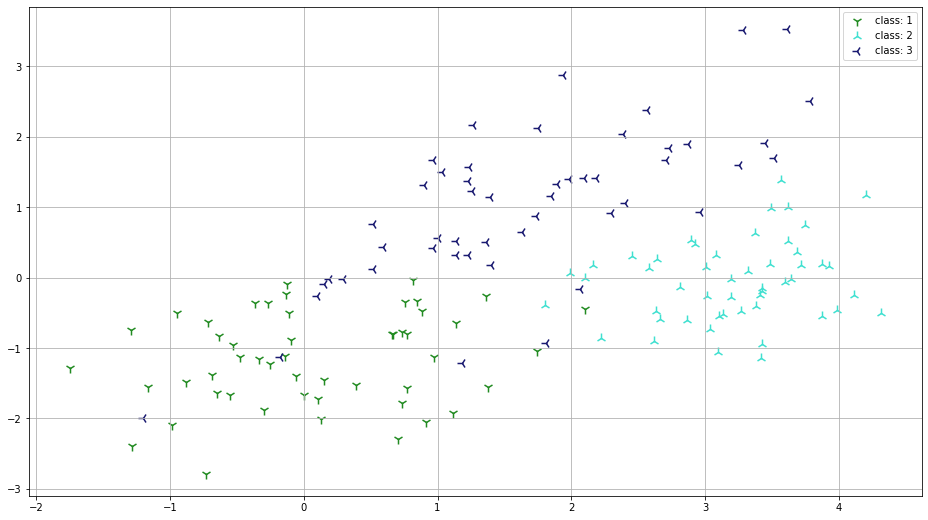

In [461]:
fig, ax = plt.subplots(figsize=(16, 9))
ax = ax.grid()
colors = ['forestgreen', 'turquoise', 'midnightblue']
for i in range(3):
    plt.scatter(df[df['class'] == i + 1][first_variable], df[df['class'] == i + 1][second_variable], 
             color=colors[i], marker= str(i + 1), label='class: ' + str(i + 1), s=100)
plt.legend()
plt.show()

## Task 6.

In [462]:
model_lr = LogisticRegression()
model_lr.fit(train_df[[first_variable, second_variable]], train_df['class'])

LogisticRegression()

In [463]:
# Plotting decision regions
X = train_df[[first_variable, second_variable]]
Y = train_df['class']
x_min, x_max = X[first_variable].min() - 1, X[first_variable].max() + 1
y_min, y_max = X[second_variable].min() - 1, X[second_variable].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
predicted = model_lr.predict(np.c_[xx.ravel(), yy.ravel()])
predicted = predicted.reshape(xx.shape)

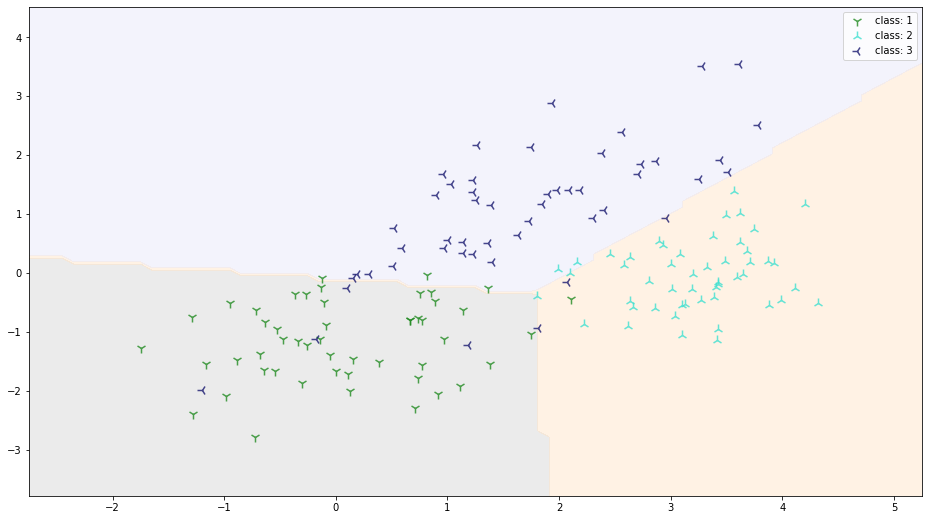

In [464]:
plt.figure(figsize = (16, 9))
plt.contourf(xx, yy, predicted, alpha=0.45, levels=2, 
             colors=['lightgrey', 'bisque', 'lavender'])

for i in range(3):
    plt.scatter(df[df['class'] == i + 1][first_variable], df[df['class'] == i + 1][second_variable], 
             color=colors[i], marker= str(i + 1), label='class: ' + str(i + 1), s=100, alpha=0.8)
plt.legend()
plt.show()

## Task 7.

In [465]:
model_knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_knn_3.fit(train_df[[first_variable, second_variable]], train_df['class'])

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [466]:
# Plotting decision regions
X = train_df[[first_variable, second_variable]]
Y = train_df['class']
x_min, x_max = X[first_variable].min() - 1, X[first_variable].max() + 1
y_min, y_max = X[second_variable].min() - 1, X[second_variable].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
predicted = model_knn_3.predict(np.c_[xx.ravel(), yy.ravel()])
predicted = predicted.reshape(xx.shape)

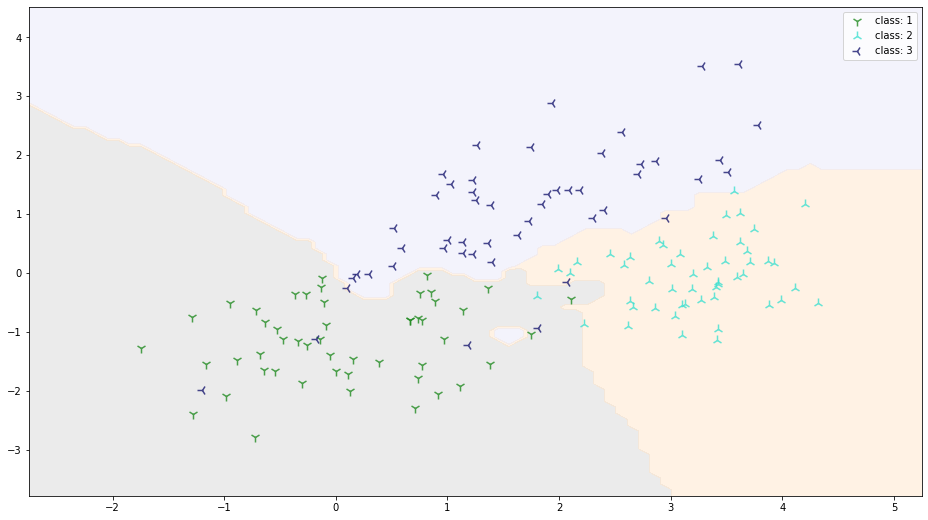

In [467]:
plt.figure(figsize = (16, 9))
plt.contourf(xx, yy, predicted, alpha=0.45, levels=2, 
             colors=['lightgrey', 'bisque', 'lavender'])

for i in range(3):
    plt.scatter(df[df['class'] == i + 1][first_variable], df[df['class'] == i + 1][second_variable], 
             color=colors[i], marker= str(i + 1), label='class: ' + str(i + 1), s=100, alpha=0.8)
plt.legend()
plt.show()

In [468]:
model_knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn_5.fit(train_df[[first_variable, second_variable]], train_df['class'])

KNeighborsClassifier(metric='euclidean')

In [469]:
# Plotting decision regions
X = train_df[[first_variable, second_variable]]
Y = train_df['class']
x_min, x_max = X[first_variable].min() - 1, X[first_variable].max() + 1
y_min, y_max = X[second_variable].min() - 1, X[second_variable].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
predicted = model_knn_5.predict(np.c_[xx.ravel(), yy.ravel()])
predicted = predicted.reshape(xx.shape)

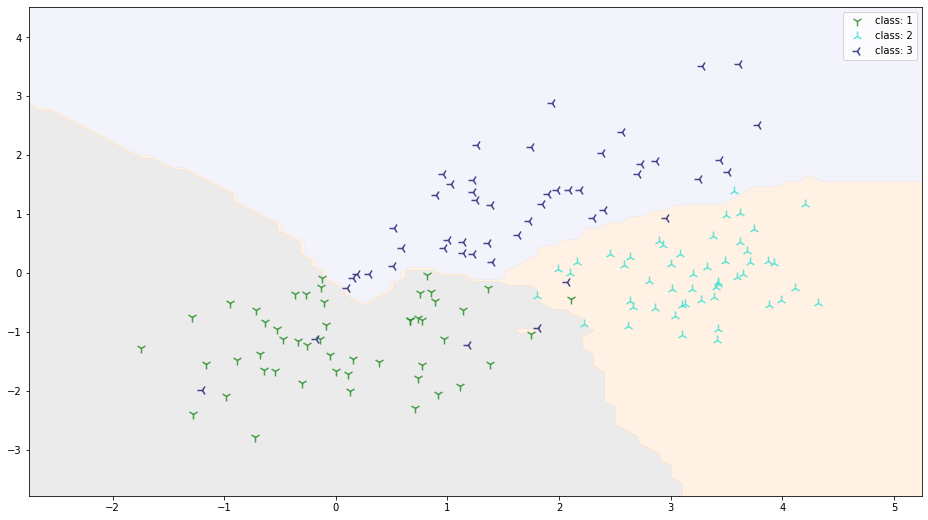

In [470]:
plt.figure(figsize = (16, 9))
plt.contourf(xx, yy, predicted, alpha=0.45, levels=2, 
             colors=['lightgrey', 'bisque', 'lavender'])

for i in range(3):
    plt.scatter(df[df['class'] == i + 1][first_variable], df[df['class'] == i + 1][second_variable], 
             color=colors[i], marker= str(i + 1), label='class: ' + str(i + 1), s=100, alpha=0.8)
plt.legend()
plt.show()

## Task 8.

In [471]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
test_df['predicted_class_LDA'] = model_lda.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
test_df

,class,x.1,x.2,x.3,x.4,predicted_class_LR,predicted_class_knn_3,predicted_class_knn_5,predicted_class_LDA
0,3,1.454102,0.098975,2.730600,1.837127,3,3,3,3
1,2,-1.768792,4.124632,3.130532,-0.523386,2,2,2,2
2,1,-2.523846,2.414492,0.769935,-1.571833,1,1,1,1
3,2,-2.390840,-0.481695,3.876998,-0.544333,2,2,2,2
4,1,-0.553097,1.651351,-0.268500,-0.364517,1,3,3,1
5,2,-0.629917,0.449702,3.622952,1.006601,2,2,2,2
6,2,-1.247763,-0.462835,2.896703,0.530377,2,2,2,2
7,2,-0.881090,1.147650,3.749726,0.741464,2,2,2,2
8,3,0.585640,1.685879,2.400774,1.058822,3,3,3,3
9,1,-1.099173,-2.770337,-0.525351,-0.963432,1,1,1,1


In [472]:
df_compare = test_df['class'].compare(test_df['predicted_class_LDA'])
print('Errors: ' + str(len(df_compare['self'])))
df_compare

Errors: 0


,self,other


## Task 9.

In [473]:
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
test_df['predicted_class_QDA'] = model_qda.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
test_df

,class,x.1,x.2,x.3,x.4,predicted_class_LR,predicted_class_knn_3,predicted_class_knn_5,predicted_class_LDA,predicted_class_QDA
0,3,1.454102,0.098975,2.730600,1.837127,3,3,3,3,3
1,2,-1.768792,4.124632,3.130532,-0.523386,2,2,2,2,2
2,1,-2.523846,2.414492,0.769935,-1.571833,1,1,1,1,1
3,2,-2.390840,-0.481695,3.876998,-0.544333,2,2,2,2,2
4,1,-0.553097,1.651351,-0.268500,-0.364517,1,3,3,1,1
5,2,-0.629917,0.449702,3.622952,1.006601,2,2,2,2,2
6,2,-1.247763,-0.462835,2.896703,0.530377,2,2,2,2,2
7,2,-0.881090,1.147650,3.749726,0.741464,2,2,2,2,2
8,3,0.585640,1.685879,2.400774,1.058822,3,3,3,3,3
9,1,-1.099173,-2.770337,-0.525351,-0.963432,1,1,1,1,1


In [474]:
df_compare = test_df['class'].compare(test_df['predicted_class_QDA'])
print('Errors: ' + str(len(df_compare['self'])))
df_compare

Errors: 0


,self,other


## Task 10.

In [475]:
new_train_df = train_df.loc[train_df['class'] != 3]
new_test_df = test_df.loc[test_df['class'] != 3].reset_index(drop=True)
new_test_df

,class,x.1,x.2,x.3,x.4,predicted_class_LR,predicted_class_knn_3,predicted_class_knn_5,predicted_class_LDA,predicted_class_QDA
0,2,-1.768792,4.124632,3.130532,-0.523386,2,2,2,2,2
1,1,-2.523846,2.414492,0.769935,-1.571833,1,1,1,1,1
2,2,-2.390840,-0.481695,3.876998,-0.544333,2,2,2,2,2
3,1,-0.553097,1.651351,-0.268500,-0.364517,1,3,3,1,1
4,2,-0.629917,0.449702,3.622952,1.006601,2,2,2,2,2
5,2,-1.247763,-0.462835,2.896703,0.530377,2,2,2,2,2
6,2,-0.881090,1.147650,3.749726,0.741464,2,2,2,2,2
7,1,-1.099173,-2.770337,-0.525351,-0.963432,1,1,1,1,1
8,1,-2.331633,-0.412985,-0.985260,-2.089342,1,1,1,1,1
9,1,-2.439309,0.110062,0.389800,-1.519951,1,1,1,1,1


In [476]:
model_svc = SVC()
model_svc.fit(new_train_df[['x.1', 'x.2', 'x.3', 'x.4']], new_train_df['class'])
new_test_df['predicted_class_SVC'] = model_svc.predict(new_test_df[['x.1', 'x.2', 'x.3', 'x.4']])
new_test_df

,class,x.1,x.2,x.3,x.4,predicted_class_LR,predicted_class_knn_3,predicted_class_knn_5,predicted_class_LDA,predicted_class_QDA,predicted_class_SVC
0,2,-1.768792,4.124632,3.130532,-0.523386,2,2,2,2,2,2
1,1,-2.523846,2.414492,0.769935,-1.571833,1,1,1,1,1,1
2,2,-2.390840,-0.481695,3.876998,-0.544333,2,2,2,2,2,2
3,1,-0.553097,1.651351,-0.268500,-0.364517,1,3,3,1,1,1
4,2,-0.629917,0.449702,3.622952,1.006601,2,2,2,2,2,2
5,2,-1.247763,-0.462835,2.896703,0.530377,2,2,2,2,2,2
6,2,-0.881090,1.147650,3.749726,0.741464,2,2,2,2,2,2
7,1,-1.099173,-2.770337,-0.525351,-0.963432,1,1,1,1,1,1
8,1,-2.331633,-0.412985,-0.985260,-2.089342,1,1,1,1,1,1
9,1,-2.439309,0.110062,0.389800,-1.519951,1,1,1,1,1,1


In [477]:
df_compare = new_test_df['class'].compare(new_test_df['predicted_class_SVC'])
print('Errors: ' + str(len(df_compare['self'])))
df_compare

Errors: 0


,self,other


## Task 11.

In [478]:
p = 0.1
M = 100
errors_lr = []
errors_knn_5 = []
errors_lda = []
errors_qda = []
errors_svc = []

In [479]:
for _ in range(M):
    test_df = df.sample(n=int(len(df['class']) * p))
    train_df = df.drop(index=test_df.index)
    train_df.reset_index(drop=True, inplace=True)
    test_df.reset_index(drop=True, inplace=True)

    model_lr = LogisticRegression()
    model_lr.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
    test_df['predicted_class_lr'] = model_lr.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
    errors_lr.append(1 - accuracy_score(test_df['class'], test_df['predicted_class_lr']))

    model_knn_5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    model_knn_5.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
    test_df['predicted_class_knn'] = model_knn_5.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
    errors_knn_5.append(1 - accuracy_score(test_df['class'], test_df['predicted_class_knn']))

    model_lda = LinearDiscriminantAnalysis()
    model_lda.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
    test_df['predicted_class_lda'] = model_lda.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
    errors_lda.append(1 - accuracy_score(test_df['class'], test_df['predicted_class_lda']))

    model_qda = QuadraticDiscriminantAnalysis()
    model_qda.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
    test_df['predicted_class_qda'] = model_qda.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
    errors_qda.append(1 - accuracy_score(test_df['class'], test_df['predicted_class_qda']))

    model_svc = SVC()
    model_svc.fit(train_df[['x.1', 'x.2', 'x.3', 'x.4']], train_df['class'])
    test_df['predicted_class_svc'] = model_svc.predict(test_df[['x.1', 'x.2', 'x.3', 'x.4']])
    errors_svc.append(1 - accuracy_score(test_df['class'], test_df['predicted_class_svc']))

In [480]:
results = pd.DataFrame(data={'Methods': ['LogisticRegression', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis', 
                                        'QuadraticDiscriminantAnalysis', 'SVC'],
                             'Mean Error': [np.mean(errors_lr), np.mean(errors_knn_5), np.mean(errors_lda),
                                           np.mean(errors_qda), np.mean(errors_svc)]})
results

,Methods,Mean Error
0,LogisticRegression,0.108667
1,KNeighborsClassifier,0.108667
2,LinearDiscriminantAnalysis,0.104000
3,QuadraticDiscriminantAnalysis,0.106667
4,SVC,0.094667


In [481]:
results[results['Mean Error'] == results['Mean Error'].min()]

,Methods,Mean Error
4,SVC,0.094667


## Task 12.